In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os

### Define Age Range

In [5]:
cleaned_users = pd.read_csv('../data/clean/user_profile.csv')

Text(0, 0.5, 'Number of Users')

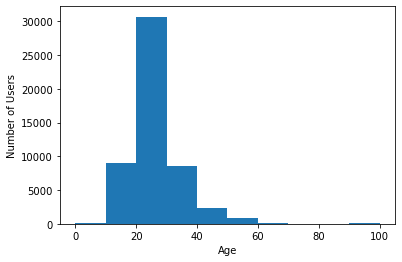

In [6]:
plt.hist(cleaned_users.age, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xlabel('Age')
plt.ylabel('Number of Users')

In [7]:
cleaned_users.head()

,user_id,age,country
0,00007a47085b9aab8af55f52ec8846ac479ac4fe,28.0,United States
1,0001a57568309b287363e72dc682e9a170ba6dc2,23.0,United States
2,00024b5b85c40f990c28644d53257819980bf6bb,23.0,United States
3,0002dd2154072434d26e5409faa591bfb260a01e,30.0,United States
4,00032c7933e0eb05f2258f1147ef81a90f2d4d6c,26.0,United States


In [8]:
def extract_users(df, age, age_range):
    start = age - age_range
    end = age + age_range
    users_selected = df[(df['age'] >= start) & (df['age'] <= end)].reset_index(drop=True)
    return users_selected

In [9]:
extract_users(cleaned_users, 42, 5)

,user_id,age,country
0,0008538a0f505f72fdd66af3c4c71aef8d3bdea4,47.0,United States
1,000d878a6b2c852089e1a57698dc7f7df76cde6a,45.0,United States
2,00145c6f4477a15b5ea78d86f6e60c28e33f353c,45.0,United States
3,00562cdf605a5bfe55bd971cb23bd4d05115d862,39.0,United States
4,006cc2d3a76f75a399098eee512b2f645a049fc1,38.0,United States
...,...,...,...
3968,ffaf72820a4d9d0b61415c48efb19c2f09858fa7,46.0,United States
3969,ffb3d364b4cda0dc0661ac1e104b3ca9a39516b8,39.0,United States
3970,fff69e7cb53568c732909648527a778c31befec8,38.0,United States
3971,fff820efe22db6c868515436de82af39e013b910,44.0,United States


### Apply Age Range to Artist Listening History

In [10]:
def extract_histories(df, users):
    extracted_history = df[df['user_id'].isin(users['user_id'])]
    return extracted_history

In [11]:
chosen_users = extract_users(cleaned_users, 55, 5)

In [12]:
cleaned_history = pd.read_csv('../data/clean/user_artist.csv')

In [13]:
cleaned_history = extract_histories(cleaned_history, cleaned_users)

In [14]:
cleaned_history.head()

,user_id,artist_id,artist_name,plays
0,00007a47085b9aab8af55f52ec8846ac479ac4fe,0110e63e-0a9b-4818-af8e-41e180c20b9a,devendra banhart,456
1,00007a47085b9aab8af55f52ec8846ac479ac4fe,69158f97-4c07-4c4e-baf8-4e4ab1ed666e,boards of canada,407
2,00007a47085b9aab8af55f52ec8846ac479ac4fe,e162b2eb-6a42-4240-8c1b-c94d9a0acb73,cocorosie,386
3,00007a47085b9aab8af55f52ec8846ac479ac4fe,f22942a1-6f70-4f48-866e-238cb2308fbd,aphex twin,213
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,0c751690-c784-4a4f-b1e4-c1de27d47581,animal collective,203


In [15]:
cleaned_history.shape

(2575300, 4)

In [16]:
chosen_history = extract_histories(cleaned_history, chosen_users)

In [17]:
chosen_users.head()

,user_id,age,country
0,000912716c36131c4d8591da475c93337e7196a7,57.0,United States
1,00496ca782bbd63ef3fb5ac7db30cc7bef508e22,50.0,United States
2,00f251370e500f9a3a93f38d8610fe38f6bbb3f5,51.0,United States
3,01870107318a18555a17bc7ed62aa4cbf7cf27f6,58.0,United States
4,01e217e8c9b0babb4f882588d1e25d72788ea18e,55.0,United States


In [18]:
chosen_history.head()

,user_id,artist_id,artist_name,plays
473,000912716c36131c4d8591da475c93337e7196a7,02294a9c-c924-4a59-877d-3ee98ee05ae1,sexteto mayor,29
474,000912716c36131c4d8591da475c93337e7196a7,4d483147-c871-48c4-8470-85e5a66381c5,celtic woman,24
475,000912716c36131c4d8591da475c93337e7196a7,7629ca32-b4fd-4598-aa20-956552826ee3,patrick williams,24
476,000912716c36131c4d8591da475c93337e7196a7,4f8ef4a3-40fa-46b5-8773-97686a8424f4,Édith piaf,18
477,000912716c36131c4d8591da475c93337e7196a7,3c004c98-aab6-4b63-a2df-e07c98e73b0a,josé feliciano,13


In [19]:
most_occurrence = pd.DataFrame(chosen_history.groupby('artist_name')['plays'].count().sort_values(ascending=False))

In [20]:
most_occurrence[:20]

,plays
artist_name,
the beatles,318
the rolling stones,212
bob dylan,185
the who,145
pink floyd,135
neil young,134
led zeppelin,133
fleetwood mac,125
simon & garfunkel,122


### Working with Spotipy

### Working with Spotipy

In [21]:
import spotipy

In [22]:
# Application information
client_id = 'f78a4f4cfe9c40ea8fe346b0576e98ea'
client_secret = 'c26db2d4c1fb42d79dc99945b2360ab4'

# Temporary placeholder until we actually get a website going
redirect_uri = 'https://google.com/'

# The permissions that our application will ask for
scope = " ".join(['playlist-modify-public',"user-top-read","user-read-recently-played","playlist-read-private"])

username = 'gazzaniga3'

In [23]:
%%cmd

SET SPOTIPY_CLIENT_ID=client_id
SET SPOTIPY_CLIENT_SECRET=client_secret
SET SPOTIPY_REDIRECT_URI=redirect_uri

Microsoft Windows [Version 10.0.19042.804]
(c) 2020 Microsoft Corporation. All rights reserved.

C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>
C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>SET SPOTIPY_CLIENT_ID=client_id

C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>SET SPOTIPY_CLIENT_SECRET=client_secret

C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>SET SPOTIPY_REDIRECT_URI=redirect_uri

C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>

In [24]:
print(os.environ.get('SPOTIPY_CLIENT_ID'))
print(os.environ.get('SPOTIPY_CLIENT_SECRET'))
print(os.environ.get('SPOTIPY_REDIRECT_URI'))

None
None
None


In [25]:
# Oauth object    
sp_oauth = spotipy.oauth2.SpotifyOAuth(client_id, client_secret, redirect_uri, scope=scope, username=username)

# Force auth every time
authUrl = sp_oauth.get_authorize_url()
authUrl

'https://accounts.spotify.com/authorize?client_id=f78a4f4cfe9c40ea8fe346b0576e98ea&response_type=code&redirect_uri=https%3A%2F%2Fgoogle.com%2F&scope=playlist-modify-public+playlist-read-private+user-read-recently-played+user-top-read'

In [26]:
try:
    sp = spotipy.Spotify(auth_manager=sp_oauth)
except:
    os.remove(f'.cache-{username}')
    sp = spotipy.Spotify(auth_manager=sp_oauth)


In [27]:
get_artist = sp.search("the beatles")['tracks']['items'][0]['album']['artists'][0]['uri']

In [28]:
get_artist

'spotify:artist:3WrFJ7ztbogyGnTHbHJFl2'

In [29]:
get_tracks = sp.artist_top_tracks(get_artist)

In [30]:
get_tracks

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3WrFJ7ztbogyGnTHbHJFl2'},
      'href': 'https://api.spotify.com/v1/artists/3WrFJ7ztbogyGnTHbHJFl2',
      'id': '3WrFJ7ztbogyGnTHbHJFl2',
      'name': 'The Beatles',
      'type': 'artist',
      'uri': 'spotify:artist:3WrFJ7ztbogyGnTHbHJFl2'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/0ETFjACtuP2ADo6LFhL6HN'},
    'href': 'https://api.spotify.com/v1/albums/0ETFjACtuP2ADo6LFhL6HN',
    'id': '0ETFjACtuP2ADo6LFhL6HN',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273dc30583ba717007b00cceb25',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02dc30583ba717007b00cceb25',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d00004851dc30583ba717007b00cceb25',
      'width': 64}],
    'name': 'Abbey Road (Remastered)',
    'releas

In [31]:
top_tracks = []

In [32]:
for track in get_tracks['tracks'][:10]:
    top_tracks.append(track['name'])

In [33]:
top_tracks

['Here Comes The Sun - Remastered 2009',
 'Come Together - Remastered 2009',
 'Let It Be - Remastered 2009',
 'Yesterday - Remastered 2009',
 'Hey Jude - Remastered 2015',
 'Blackbird - Remastered 2009',
 'Twist And Shout - Remastered 2009',
 'In My Life - Remastered 2009',
 'I Want To Hold Your Hand - Remastered 2015',
 'Help! - Remastered 2009']

In [34]:
get_related_artists = sp.artist_related_artists(get_artist)

In [35]:
get_related_artists

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4x1nvY2FN8jxqAFA0DA02H'},
   'followers': {'href': None, 'total': 3990685},
   'genres': ['album rock',
    'art rock',
    'beatlesque',
    'classic rock',
    'folk rock',
    'mellow gold',
    'rock'],
   'href': 'https://api.spotify.com/v1/artists/4x1nvY2FN8jxqAFA0DA02H',
   'id': '4x1nvY2FN8jxqAFA0DA02H',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/bb44a853b1bae0d3ad25816af544085791f09600',
     'width': 640},
    {'height': 320,
     'url': 'https://i.scdn.co/image/2b6ffb524bdaaba9c8d690368d4eed9c60fce0dd',
     'width': 320},
    {'height': 160,
     'url': 'https://i.scdn.co/image/af2e1986a819b2c79a3ba67ee10c17fc93374818',
     'width': 160}],
   'name': 'John Lennon',
   'popularity': 75,
   'type': 'artist',
   'uri': 'spotify:artist:4x1nvY2FN8jxqAFA0DA02H'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/7FIoB5PHdrMZVC3q2HE5MS'},
   'followers': {'href': Non

In [36]:
related_artists = []
for artist in get_related_artists['artists'][:10]:
    related_artists.append(artist['name'])

In [37]:
related_artists

['John Lennon',
 'George Harrison',
 'Paul McCartney',
 'The Beach Boys',
 'Ringo Starr',
 'The Kinks',
 'The Rolling Stones',
 'Bob Dylan',
 'The Hollies',
 'Simon & Garfunkel']

In [38]:
artist = sp.artist(get_artist)

In [39]:
artist

{'external_urls': {'spotify': 'https://open.spotify.com/artist/3WrFJ7ztbogyGnTHbHJFl2'},
 'followers': {'href': None, 'total': 18832925},
 'genres': ['beatlesque',
  'british invasion',
  'classic rock',
  'merseybeat',
  'psychedelic rock',
  'rock'],
 'href': 'https://api.spotify.com/v1/artists/3WrFJ7ztbogyGnTHbHJFl2',
 'id': '3WrFJ7ztbogyGnTHbHJFl2',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/6b2a709752ef9c7aaf0d270344157f6cd2e0f1a7',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/1047bf172446f2a815a99ab0a0395099d621be51',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/0561b59a91a5e904ad2d192747715688d5f05012',
   'width': 160}],
 'name': 'The Beatles',
 'popularity': 89,
 'type': 'artist',
 'uri': 'spotify:artist:3WrFJ7ztbogyGnTHbHJFl2'}

In [40]:
artist_genres = artist['genres']

In [41]:
artist_genres

['beatlesque',
 'british invasion',
 'classic rock',
 'merseybeat',
 'psychedelic rock',
 'rock']

### Build Dataset Features

In [42]:
def get_genres(row):
    artist = row['artist_name']
    uri = sp.search(artist)['tracks']['items'][0]['album']['artists'][0]['uri']
    artist_info = sp.artist(uri)
    genres = artist_info['genres']
    row['genres'] = genres
    return row

In [43]:
def get_related_artists(uri):
    related = sp.artist_related_artists(uri)
    related_lst = []
    for artist in related['artists'][:5]:
        related_lst.append(artist['name'])
    return related_lst

In [44]:
def get_top_tracks(uri):
    top_tracks = sp.artist_top_tracks(uri)
    top_lst = []
    for track in top_tracks['tracks'][:5]:
        top_lst.append(track['id'])
    return top_lst

In [45]:
def extract_features(row):
    artist = row['artist_name']
    uri = sp.search(artist)['tracks']['items'][0]['album']['artists'][0]['uri']
    related_artists_extracted = get_related_artist(uri)
    top_tracks_extracted = get_top_tracks(uri)
    artist_info = sp.artist(uri)
    genres = artist_info['genres']
    popularity = artist_info['popularity']
    followers = artist_info['followers']['total']
    row['uri'] = uri
    row['genres'] = genres
    row['related_artists'] = related_artists_extracted
    row['top_tracks'] = top_tracks_extracted
    row['popularity'] = popularity
    row['followers'] = followers
    return row

In [46]:
top_artists = most_occurrence

In [47]:
top_artists.reset_index(level=0, inplace=True)

In [48]:
top_artists = top_artists[top_artists['plays'] > 10]

In [49]:
top_artists

,artist_name,plays
0,the beatles,318
1,the rolling stones,212
2,bob dylan,185
3,the who,145
4,pink floyd,135
...,...,...
777,joshua radin,11
778,whitney houston,11
779,george duke,11
780,vince gill,11


In [50]:
#top_artist_df = top_artists.apply(extract_features, axis=1)

In [51]:
#top_artist_df

In [52]:
#selection = ['country']

In [53]:
#top_artist_df = top_artist_df[top_artist_df.genres.apply(lambda x: bool(set(x) & set(selection)))]

In [54]:
#top_artist_df

In [55]:
#top_tracks = pd.DataFrame(top_artist_df['top_tracks'].explode().reset_index(drop=True))

In [56]:
#top_tracks.columns = ['track_name']

In [57]:
#top_tracks = top_tracks[:100]

In [58]:
#top_tracks

In [59]:
def extract_track_features(row):
    uri = sp.search(row)['tracks']['items'][0]['uri']
    features = sp.audio_features(uri)[0]
    dance = features['danceability']
    energy = features['energy']
    key = features['key']
    loudness = features['loudness']
    mode = features['mode']
    speech = features['speechiness']
    acoustic = features['acousticness']
    instrument = features['instrumentalness']
    live = features['liveness']
    valence = features['valence']
    tempo = features['tempo']
    return uri, dance, energy, key, loudness, mode, speech, acoustic, instrument, live, valence, tempo

In [60]:
#top_tracks['uri'], top_tracks['danceability'], top_tracks['energy'], top_tracks['key'], top_tracks['loudness'], top_tracks['mode'], top_tracks['speechiness'], top_tracks['acousticness'], top_tracks['instrumentalness'], top_tracks['liveness'], top_tracks['valence'], top_tracks['valence'] = zip(*top_tracks['track_name'].apply(extract_track_features))

In [61]:
#top_tracks

### Building CF Algorithm

### Implicit

In [62]:
import scipy.sparse as sparse
import numpy as np
import random
import implicit
from sklearn.preprocessing import MinMaxScaler

In [63]:
ap = chosen_history

In [64]:
#artist_rank = ap.groupby(['artist_name']) \
  #.agg({'user_id' : 'count', 'plays' : 'sum'}) \
  #.rename(columns={"user_id" : 'totalUniqueUsers', "plays" : "totalArtistPlays"}) \
  #.sort_values(['totalArtistPlays'], ascending=False)
#artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays'] / artist_rank['totalUniqueUsers']

In [65]:
#ap = ap.join(artist_rank, on="artist_name", how="inner") \
  #.sort_values(['plays'], ascending=False)

In [66]:
pc = ap.plays
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [67]:
ap

,user_id,artist_id,artist_name,plays,playCountScaled
473,000912716c36131c4d8591da475c93337e7196a7,02294a9c-c924-4a59-877d-3ee98ee05ae1,sexteto mayor,29,0.000542
474,000912716c36131c4d8591da475c93337e7196a7,4d483147-c871-48c4-8470-85e5a66381c5,celtic woman,24,0.000445
475,000912716c36131c4d8591da475c93337e7196a7,7629ca32-b4fd-4598-aa20-956552826ee3,patrick williams,24,0.000445
476,000912716c36131c4d8591da475c93337e7196a7,4f8ef4a3-40fa-46b5-8773-97686a8424f4,Édith piaf,18,0.000329
477,000912716c36131c4d8591da475c93337e7196a7,3c004c98-aab6-4b63-a2df-e07c98e73b0a,josé feliciano,13,0.000232
...,...,...,...,...,...
2574776,fff1e43c0de9a713783f1c92f65afb0b8b74498b,fcfa9543-e113-4ef9-9ef6-455ba4cbe7af,jim croce,6,0.000097
2574777,fff1e43c0de9a713783f1c92f65afb0b8b74498b,c3649208-0ebe-449b-b1d7-4bd6c560f109,john fogerty,6,0.000097
2574778,fff1e43c0de9a713783f1c92f65afb0b8b74498b,1efadc05-01b5-4a39-9c6f-da5c975276dd,mary gauthier,6,0.000097
2574779,fff1e43c0de9a713783f1c92f65afb0b8b74498b,b9ffd0e7-7f95-46db-bc1c-8094d459f084,nanci griffith,6,0.000097


In [68]:
ap = ap.drop_duplicates()
grouped_df = ap.groupby(['user_id', 'artist_id', 'artist_name']).sum().reset_index()

In [69]:
grouped_df['artist_name'] = grouped_df['artist_name'].astype("category")
grouped_df['user_id'] = grouped_df['user_id'].astype("category")
grouped_df['artist_id'] = grouped_df['artist_id'].astype("category")
grouped_df['user_id'] = grouped_df['user_id'].cat.codes
grouped_df['artist_id'] = grouped_df['artist_id'].cat.codes

In [70]:
grouped_df

,user_id,artist_id,artist_name,plays,playCountScaled
0,0,119,sexteto mayor,29,0.000542
1,0,485,libertad lamarque,7,0.000116
2,0,715,daniel santos,9,0.000155
3,0,1393,edmundo rivero,9,0.000155
4,0,1995,leo marini,10,0.000174
...,...,...,...,...,...
42981,874,10700,harry nilsson,6,0.000097
42982,874,10777,john hiatt,7,0.000116
42983,874,10826,john prine,7,0.000116
42984,874,11680,the mills brothers,12,0.000213


In [71]:
import ipywidgets
from ipywidgets import FloatProgress

### Incorporate User Playlist

In [72]:
r = sp.current_user_playlists()

In [73]:
def parse_playlist_ids(response):
    playlist_ids = []
    for item in response['items']:
        pid = item['id']

        playlist_ids.append(pid)
    return playlist_ids

In [74]:
def parse_track_info(response):
    track_names = []
    artist_names = []
    album_names = []
    
    for item in response['items']:
        # Gets the name of the track
        if item is None or item['track'] is None:
            continue
        track = item['track']['name']
        # Gets the name of the album
        album = item['track']['album']['name']
        # Gets the name of the first artist listed under album artists
        artist = item['track']['album']['artists'][0]['name']
             
        track_names.append(track)
        album_names.append(album)
        artist_names.append(artist) 
    return track_names, album_names, artist_names

In [75]:
playlist_ids = parse_playlist_ids(r)

In [76]:
# Pull all the tracks from a playlist
tracks = []
albums = []
artists = []

In [77]:
artists

[]

In [78]:
# Loop through each playlist one by one
for pid in playlist_ids:
    # Request all track information
    r = sp.playlist_items(pid)
    tracks_pulled, albums_pulled, artists_pulled = parse_track_info(r)
    artists.extend(artists_pulled)    

In [79]:
playlist_artists = pd.Series(artists)

In [80]:
playlist_artists.head()

0    Mariah Carey
1    Mariah Carey
2    Mariah Carey
3    Mariah Carey
4    Mariah Carey
dtype: object

In [81]:
playlist_artists.shape

(448,)

In [82]:
playlist_grouped = playlist_artists.value_counts(normalize=True)

In [83]:
playlist_grouped.head()

Travis Scott       0.046875
Various Artists    0.015625
J. Cole            0.015625
Trippie Redd       0.015625
Drake              0.013393
dtype: float64

In [84]:
no_artist = playlist_grouped.shape[0]

In [85]:
no_artist

265

In [86]:
curr_user = grouped_df.iloc[-1]['user_id'] + 1

In [87]:
curr_user 

875

In [88]:
curr_user_id = [curr_user] * no_artist

In [89]:
playlist_df = pd.DataFrame(playlist_grouped, columns=['playCountScaled']) 

In [90]:
playlist_df.reset_index(level=0, inplace=True)

In [91]:
playlist_df.columns = ['artist_name', 'playCountScaled']

In [92]:
playlist_df['user_id'] = pd.Series(curr_user_id)

In [93]:
playlist_df

,artist_name,playCountScaled,user_id
0,Travis Scott,0.046875,875
1,Various Artists,0.015625,875
2,J. Cole,0.015625,875
3,Trippie Redd,0.015625,875
4,Drake,0.013393,875
...,...,...,...
260,Nessa Barrett,0.002232,875
261,Big Mountain,0.002232,875
262,Modern English,0.002232,875
263,Selena Gomez,0.002232,875


In [94]:
cols = playlist_df.columns.tolist()

In [95]:
cols = cols[-1:] + cols[:-1]

In [96]:
playlist_df = playlist_df[cols]

In [97]:
playlist_df.head()

,user_id,artist_name,playCountScaled
0,875,Travis Scott,0.046875
1,875,Various Artists,0.015625
2,875,J. Cole,0.015625
3,875,Trippie Redd,0.015625
4,875,Drake,0.013393


In [98]:
playlist_df['artist_name'] = playlist_df['artist_name'].str.lower()

In [99]:
playlist_df.head()

,user_id,artist_name,playCountScaled
0,875,travis scott,0.046875
1,875,various artists,0.015625
2,875,j. cole,0.015625
3,875,trippie redd,0.015625
4,875,drake,0.013393


In [100]:
grouped_df.head()

,user_id,artist_id,artist_name,plays,playCountScaled
0,0,119,sexteto mayor,29,0.000542
1,0,485,libertad lamarque,7,0.000116
2,0,715,daniel santos,9,0.000155
3,0,1393,edmundo rivero,9,0.000155
4,0,1995,leo marini,10,0.000174


In [101]:
artist_pairing = dict(zip(grouped_df.artist_name, grouped_df.artist_id))

In [102]:
playlist_df['artist_id'] = playlist_df['artist_name'].map(artist_pairing)

In [103]:
playlist_df = playlist_df.dropna().reset_index(drop=True)

In [104]:
playlist_df['artist_id'] = playlist_df['artist_id'].astype(int)

In [105]:
playlist_df.head()

,user_id,artist_name,playCountScaled,artist_id
0,875,various artists,0.015625,6434
1,875,drake,0.013393,7501
2,875,john mayer,0.011161,933
3,875,billy joel,0.011161,4692
4,875,toni braxton,0.011161,2795


In [106]:
updated_df = grouped_df.append(playlist_df)

In [107]:
updated_df

,user_id,artist_id,artist_name,plays,playCountScaled
0,0,119,sexteto mayor,29.0,0.000542
1,0,485,libertad lamarque,7.0,0.000116
2,0,715,daniel santos,9.0,0.000155
3,0,1393,edmundo rivero,9.0,0.000155
4,0,1995,leo marini,10.0,0.000174
...,...,...,...,...,...
77,875,6102,styx,NaN,0.002232
78,875,6190,bananarama,NaN,0.002232
79,875,8323,don henley,NaN,0.002232
80,875,6379,jackson browne,NaN,0.002232


In [108]:
updated_df['artist_name'] = updated_df['artist_name'].astype("category")
updated_df['user_id'] = updated_df['user_id'].astype("category")
updated_df['artist_id'] = updated_df['artist_id'].astype("category")
updated_df['user_id'] = updated_df['user_id'].cat.codes
updated_df['artist_id'] = updated_df['artist_id'].cat.codes

In [109]:
sparse_artist_user = sparse.csr_matrix((updated_df['playCountScaled'].astype(float), (updated_df['artist_id'], updated_df['user_id'])))

In [110]:
sparse_user_artist = sparse.csr_matrix((updated_df['playCountScaled'].astype(float), (updated_df['user_id'], updated_df['artist_id'])))

In [111]:
model = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.1, iterations=50)

In [112]:
alpha = 15
data = (sparse_artist_user * alpha).astype('double')

In [113]:
model.fit(data)

In [114]:
user_vecs = sparse.csr_matrix(model.user_factors)
artist_vecs = sparse.csr_matrix(model.item_factors)

In [115]:
def recommend(user_id, sparse_user_artist, user_vecs, artist_vecs, num_contents=100):
    user_interactions = sparse_user_artist[user_id,:].toarray()
    user_interactions = user_interactions.reshape(-1) + 1
    user_interactions[user_interactions > 1] = 0
    rec_vector = user_vecs[user_id,:].dot(artist_vecs.T).toarray()
    min_max = MinMaxScaler()
    rec_vector_scaled = min_max.fit_transform(rec_vector.reshape(-1,1))[:,0]
    recommend_vector = user_interactions * rec_vector_scaled
    content_idx = np.argsort(recommend_vector)[::-1][:num_contents]
    artists = []
    artist_uris = []
    artist_genres = []
    artist_top_tracks = []
    artist_related_artists = []
    artist_related_uris = []
    scores = []
    for idx in content_idx:
        artist = grouped_df.artist_name.loc[grouped_df.artist_id == idx].iloc[0]
        artist_uri = sp.search(artist)['tracks']['items'][0]['album']['artists'][0]['uri']
        artist_info = sp.artist(artist_uri)
        artist_genre = artist_info['genres']
        artist_related = get_related_artists(artist_uri)
        artist_tracks = get_top_tracks(artist_uri)
        artists.append(grouped_df.artist_name.loc[grouped_df.artist_id == idx].iloc[0])
        artist_uris.append(artist_uri)
        artist_genres.append(artist_genre)
        artist_related_artists.append(artist_related)
        related_uris = []
        for artist in artist_related:
            try:
                related_uri = sp.search(artist, type='artist')['artists']['items'][0]['uri']
                related_uris.append(related_uri)
            except: 
                continue
        artist_related_uris.append(related_uris)
        artist_top_tracks.append(artist_tracks)
        scores.append(recommend_vector[idx])
    recommendations = pd.DataFrame({'artist_name': artists, 'artist_uri': artist_uris, 'artist_genres': artist_genres, 'artist_top_tracks': artist_top_tracks, 'artists_related': artist_related_artists, 'artists_related_uris': artist_related_uris, 'score': scores})
    return recommendations

In [116]:
# Create recommendations for current user
user_id = curr_user

recommendations = recommend(user_id, sparse_user_artist, user_vecs, artist_vecs)

#print(recommendations)

In [117]:
# User History

In [118]:
updated_df.loc[updated_df['user_id'] == curr_user].sort_values(by=['playCountScaled'], ascending=False)[['artist_name', 'user_id', 'playCountScaled']].head(10)

,artist_name,user_id,playCountScaled
0,various artists,875,0.015625
1,drake,875,0.013393
2,john mayer,875,0.011161
3,billy joel,875,0.011161
4,toni braxton,875,0.011161
5,mariah carey,875,0.011161
6,kanye west,875,0.008929
7,brandy,875,0.008929
12,elton john,875,0.006696
14,the cars,875,0.006696


In [119]:
# Recommendations

In [120]:
recommendations

,artist_name,artist_uri,artist_genres,artist_top_tracks,artists_related,artists_related_uris,score
0,bob dylan,spotify:artist:4UXqAaa6dQYAk18Lv7PEgX,"[emo, modern rock, pop punk]","[04aAxqtGp5pv12UXAg4pkq, 2TfSHkHiFO4gRztVIkggk...","[Panic! At The Disco, My Chemical Romance, All...","[spotify:artist:20JZFwl6HVl6yg8a4H3ZqK, spotif...",0.536271
1,pink floyd,spotify:artist:0k17h0D3J5VfsdmQ1iZtE9,"[album rock, art rock, classic rock, progressi...","[6mFkJmJqdDVQ1REhVfGgd1, 4gMgiXfqyzZLMhsksGmbQ...","[David Gilmour, Roger Waters, Jethro Tull, Kin...","[spotify:artist:2FcC4sDMXme2ziI7tGKMK8, spotif...",0.327064
2,neil young,spotify:artist:6v8FB84lnmJs434UJf2Mrm,"[album rock, canadian singer-songwriter, class...","[1Q1b8eVkUPGlpSArl8JAVw, 5l9c6bJmzvftumhz4TMPg...","[Crosby, Stills, Nash & Young, Crosby, Stills ...","[spotify:artist:1CYsQCypByMVgnv17qsSbQ, spotif...",0.300773
3,elvis presley,spotify:artist:43ZHCT0cAZBISjO8DG9PnE,"[adult standards, rock-and-roll, rockabilly]","[44AyOl4qVkzS48vBsbNXaC, 1H5IfYyIIAlgDX8zguUzn...","[Buddy Holly, Chuck Berry, Roy Orbison, Jerry ...","[spotify:artist:3wYyutjgII8LJVVOLrGI0D, spotif...",0.270203
4,grateful dead,spotify:artist:4TMHGUX5WI7OOm53PqSDAT,"[blues rock, classic rock, cosmic american, co...","[7LbfuQVct78YoghmoPtsQ8, 5ZLzl6T8JwqMTMdoE0nCb...","[Jerry Garcia, Widespread Panic, The String Ch...","[spotify:artist:3QDaXfnxfQqqJQK5lSdjLN, spotif...",0.248778
...,...,...,...,...,...,...,...
95,robert plant,spotify:artist:1OwarW4LEHnoep20ixRA0y,"[album rock, art rock, blues rock, classic roc...","[7257drAN3eTtaaUUPw95B3, 5hrsqusQlSqlWpvtjJpxP...","[Jimmy Page, Coverdale/Page, Keith Richards, P...","[spotify:artist:55bGuHb50r5c0PeqqMeNBV, spotif...",0.132642
96,imogen heap,spotify:artist:6Xb4ezwoAQC4516kI89nWz,"[etherpop, lilith, metropopolis]","[7mMlbJlXXo2mRtQ4R9sIzD, 0FVuyC9RP5MACjp4lgU3q...","[Frou Frou, Kate Havnevik, Jem, A Fine Frenzy,...","[spotify:artist:6MUyqmIQ35inLjch0YzIEG, spotif...",0.132601
97,air,spotify:artist:5ndkK3dpZLKtBklKjxNQwT,"[atl hip hop, dance pop, hip hop, pop, pop dan...","[6lV2MSQmRIkycDScNtrBXO, 59dLtGBS26x7kc0rHbaPr...","[Young Money, T.I., Gym Class Heroes, New Boyz...","[spotify:artist:5OrB6Jhhrl9y2PK0pSV4VP, spotif...",0.132492
98,guy clark,spotify:artist:0Ekfvspc0hlcxdfJJVjcnq,"[alternative country, country rock, folk, folk...","[4rXt1tYHZIavECuN32fk96, 6rdsM3l1UWdlWZYUB5Jgx...","[Terry Allen, Blaze Foley, Rodney Crowell, Ray...","[spotify:artist:4QonkOS6ybWrJVYFWEHMZY, spotif...",0.131276


In [121]:
selection = ['pop']

In [122]:
filtered_recommendations = recommendations[recommendations.artist_genres.apply(lambda x: bool(set(x) & set(selection)))]

In [123]:
filtered_recommendations.head()

,artist_name,artist_uri,artist_genres,artist_top_tracks,artists_related,artists_related_uris,score
17,r.e.m.,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,"[dance pop, pop, post-teen pop]","[35mvY5S1H3J2QZyna3TFe0, 6Im9k8u9iIzKMrmV7BWtl...","[Camila Cabello, Fifth Harmony, Selena Gomez, ...","[spotify:artist:4nDoRrQiYLoBzwC5BhVJzF, spotif...",0.193262
97,air,spotify:artist:5ndkK3dpZLKtBklKjxNQwT,"[atl hip hop, dance pop, hip hop, pop, pop dan...","[6lV2MSQmRIkycDScNtrBXO, 59dLtGBS26x7kc0rHbaPr...","[Young Money, T.I., Gym Class Heroes, New Boyz...","[spotify:artist:5OrB6Jhhrl9y2PK0pSV4VP, spotif...",0.132492


In [124]:
if len(filtered_recommendations) < 10:
    related_artists_lst = list(filtered_recommendations['artists_related_uris'].explode())
    related_tracks_lst = []
    for artist in related_artists_lst:
        artist_top_tracks = get_top_tracks(artist)
        related_tracks_lst.extend(artist_top_tracks)

In [125]:
top_recommended_tracks = pd.DataFrame(filtered_recommendations['artist_top_tracks'].explode())

In [126]:
top_recommended_tracks

,artist_top_tracks
17,35mvY5S1H3J2QZyna3TFe0
17,6Im9k8u9iIzKMrmV7BWtlF
17,4HBZA5flZLE435QTztThqH
17,6ocbgoVGwYJhOv1GgI9NsF
17,2sQH02O2HBCPJCztBrCWNa
97,6lV2MSQmRIkycDScNtrBXO
97,59dLtGBS26x7kc0rHbaPrq
97,2LvRR121MWFmmEGkuV2vQP
97,5uHYcK0nbEYgRaFTY5BqnP
97,28GUjBGqZVcAV4PHSYzkj2


In [127]:
N = 50

In [128]:
if len(top_recommended_tracks) < N:
    recommended_lst = top_recommended_tracks['artist_top_tracks'].tolist()
    recommended_lst.extend(related_tracks_lst)

In [129]:
top_recommended_df = pd.DataFrame(recommended_lst, columns=['song_recommendations'])

In [130]:
tracks_output = top_recommended_df.reset_index(drop=True)[:N]

In [131]:
tracks_output

,song_recommendations
0,35mvY5S1H3J2QZyna3TFe0
1,6Im9k8u9iIzKMrmV7BWtlF
2,4HBZA5flZLE435QTztThqH
3,6ocbgoVGwYJhOv1GgI9NsF
4,2sQH02O2HBCPJCztBrCWNa
5,6lV2MSQmRIkycDScNtrBXO
6,59dLtGBS26x7kc0rHbaPrq
7,2LvRR121MWFmmEGkuV2vQP
8,5uHYcK0nbEYgRaFTY5BqnP
9,28GUjBGqZVcAV4PHSYzkj2


### Evaluating CF Recommender

In [132]:
import random

In [133]:
from sklearn import metrics

In [134]:
def get_train_test(ratings, pct_test = 0.2):
    test_data = ratings.copy() # Make a copy of the original data to be test data
    test_data[test_data != 0] = 1 
    
    training_data = ratings.copy() # Make a copy of the original data to alter for training data
    
    nonzero_inds = training_data.nonzero()
    nonzero_pairs = list(zip(nonzero_inds[0], nonzero_inds[1])) 

    
    random.seed(0) # For reproducibility
    
    num_samples = int(np.ceil(pct_test*len(nonzero_pairs))) # Get the number of samples
    samples = random.sample(nonzero_pairs, num_samples) # Sample without replacement

    artist_indices = [index[0] for index in samples] 

    user_indices = [index[1] for index in samples] 

    
    training_data[artist_indices, user_indices] = 0 
    training_data.eliminate_zeros() 
    
    return training_data, test_data, list(set(user_indices))

In [135]:
training_data, test_data, artists_users_altered = get_train_test(sparse_artist_user, pct_test = 0.2)

In [136]:
def auc_score(predictions, test):
    fpr, tpr, thresholds = metrics.roc_curve(test, predictions)
    return metrics.auc(fpr, tpr)

In [137]:
def calc_avg_auc(training_set, altered_users, predictions, test_set):
    user_auc = [] # User AUC 
    most_popular_auc = [] # Popular AUC
    popular_artists = np.array(test_set.sum(axis = 1)).reshape(-1) 
    artist_vecs = predictions[1]
    for user in altered_users: 
        training_column = training_set[:,user].toarray().reshape(-1) 
        zero_inds = np.where(training_column == 0) 
        
        user_vec = predictions[0][user,:]
        predicted_user_val = user_vec.dot(artist_vecs).toarray()[0,zero_inds].reshape(-1)
        
        actual = test_set[:,user].toarray()[zero_inds,0].reshape(-1)
        
        artist_popularity = popular_artists[zero_inds] 
        
        user_auc.append(auc_score(predicted_user_val, actual)) # Calculate AUC for the given user and store
        
        most_popular_auc.append(auc_score(artist_popularity, actual)) # Calculate AUC using most popular and score
    # End users iteration
    
    return float('%.3f'%np.mean(user_auc)), float('%.3f'%np.mean(most_popular_auc))

In [138]:
auc_scores = calc_avg_auc(training_data, artists_users_altered,
              [user_vecs, artist_vecs.T], test_data)

In [139]:
auc_scores

(0.823, 0.806)

In [140]:
avg_user_auc = auc_scores[0]

In [141]:
avg_user_auc

0.823

In [142]:
avg_pop_auc = auc_scores[1]

In [143]:
avg_pop_auc

0.806

In [144]:
auc_lst = [avg_user_auc]

In [145]:
auc_df = pd.DataFrame(auc_lst, columns=['AUC Score'])

In [146]:
auc_df

,AUC Score
0,0.823
